# Students who Worked - Rashu Tyagi (5528), Pushpinder Singh(123).

# Exploratory Data Analysis on the Dataset

The attached data set consists of the following attributes:

name: Name of the player
>
club: Club of the player
>
age : Age of the player
>
position : The usual position on the pitch
>
position_cat : 
1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers
>
market_value : As on transfermrkt.com on July 20th, 2017
>
page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
>
fpl_value : Value in Fantasy Premier League as on July 20th, 2017
>
fpl_sel : % of FPL players who have selected that player in their team
>
fpl_points : FPL points accumulated over the previous season
>
region: 
1 for England

2 for EU

3 for Americas

4 for Rest of World
>
nationality
new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
>
age_cat
>
club_id
>
big_club: Whether one of the Top 6 clubs
>
new_signing: Whether a new signing for 2017/18 (till 20th July)

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [106]:
#creating the dataframe
df = pd.read_csv("/content/drive/MyDrive/Football_Price_ML/dataset.csv")
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [107]:
# features in the dataset
print("Features in the dataset given are as follows : ")
for feature in df.columns:
    print(feature)

Features in the dataset given are as follows : 
name
club
age
position
position_cat
market_value
page_views
fpl_value
fpl_sel
fpl_points
region
nationality
new_foreign
age_cat
club_id
big_club
new_signing


In [108]:
#number of features 
print(f"Number of features in the dataset are {len(df.columns)}")

Number of features in the dataset are 17


In above 17 features "market_value" is our dependent variable and rest all 16 are the predictor variables.

In [109]:
# general information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [110]:
# number of rows in dataset
df.shape[0]

461

So we have 461 data points

In [111]:
#some descriptive statistics about our dataset
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [112]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [113]:
#categorical feature columns
print("Categorical Columns in our dataset are : ")
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

Categorical Columns in our dataset are : 
name
club
position
fpl_sel
nationality


We can clearly see that fpl_sel will not be a categorical column.

In [114]:
#numerical feature columns
print("Numerical Columns in our dataset are : ")
for col in df.columns:
    if df[col].dtype in ['int64' , 'float64'] :
        print(col)

Numerical Columns in our dataset are : 
age
position_cat
market_value
page_views
fpl_value
fpl_points
region
new_foreign
age_cat
club_id
big_club
new_signing


Making some plots to learn more about our dataset

Studying about the target variable which is 'market_value'

In [115]:
df['market_value'].describe()

count    461.000000
mean      11.012039
std       12.257403
min        0.050000
25%        3.000000
50%        7.000000
75%       15.000000
max       75.000000
Name: market_value, dtype: float64

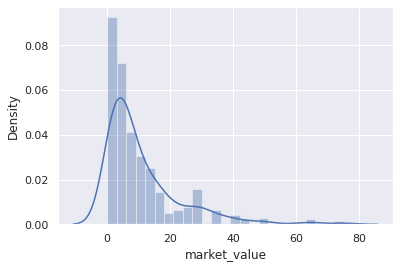

In [116]:
sns.distplot(df['market_value']);

From above we can see that there is :
- Slight Deviation from the Normal Distribution
- It is positively skewed

In [117]:
# Calculating the skewness 
print(f"Skewness in our target variable values is {df['market_value'].skew()}")

Skewness in our target variable values is 2.1625484427984265


Exploring the relationship of 'market_value' column with other features.

In [118]:
# seperating all the numerical columns
numerical_columns = []
for col in df.columns:
    if df[col].dtype in ['int64' , 'float64'] :
        numerical_columns.append(col)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

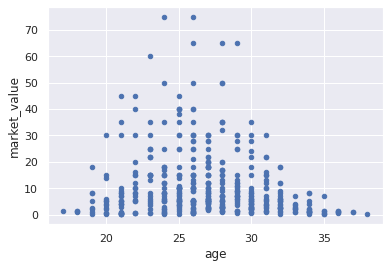

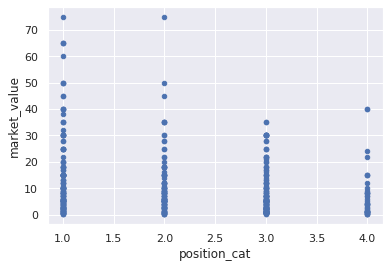

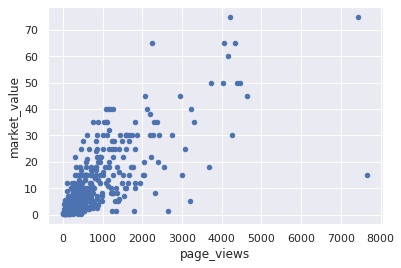

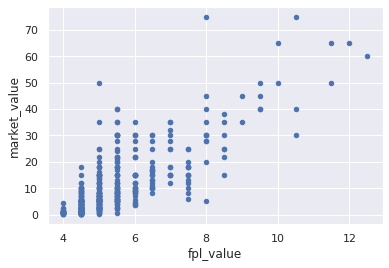

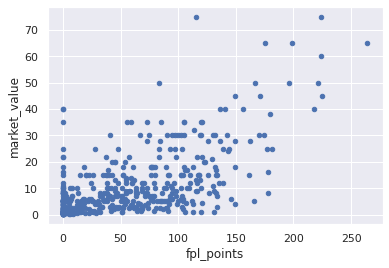

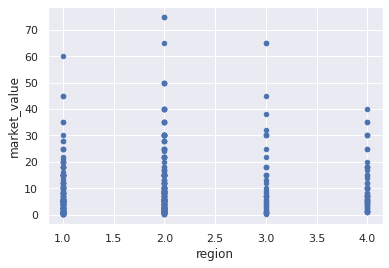

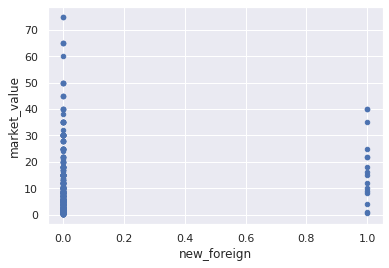

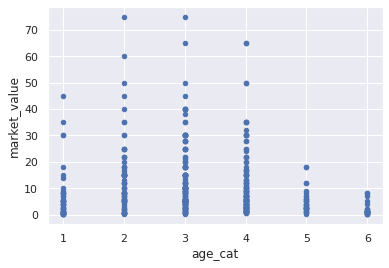

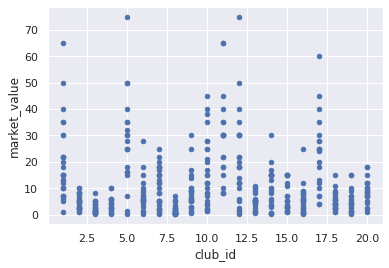

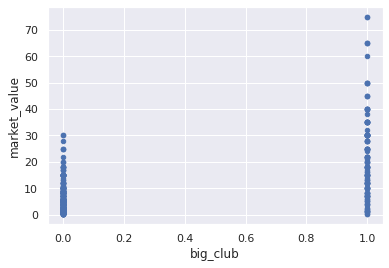

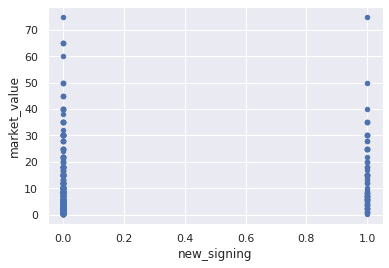

In [119]:
for col in numerical_columns:
    if col != 'market_value':
        data = pd.concat([df['market_value'], df[col]], axis=1)
        data.plot.scatter(x=col, y='market_value');

From above it can be seen that with feature like page views and flp_values and fpl_points have linear relationship with market_value

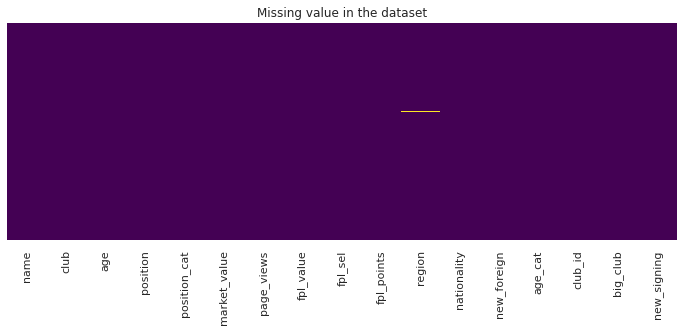

In [120]:
# checking for missing values in the dataset
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There are no missing values in the dataset.

In [121]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


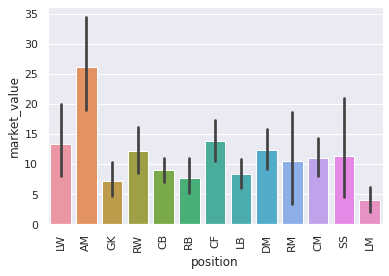

In [122]:
# let us see if market value of a player depends on his position while playing

sns.barplot(x=df['position'],y=df['market_value'])
plt.xticks(rotation='vertical')
plt.show()

Players with usual position of "AM" on the pitch have the highest average market value compared to others

In [123]:
df['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

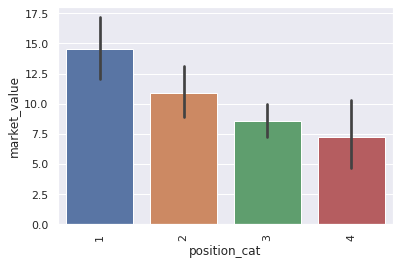

In [124]:
# let us see if market value of a player depends on his role while playing

sns.barplot(x=df['position_cat'],y=df['market_value'])
plt.xticks(rotation='vertical')
plt.show()

position_cat : 1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers
>
It means attackers have more market value compared to mid fielders and then comes defenders and the least market value if for goalkeepers.

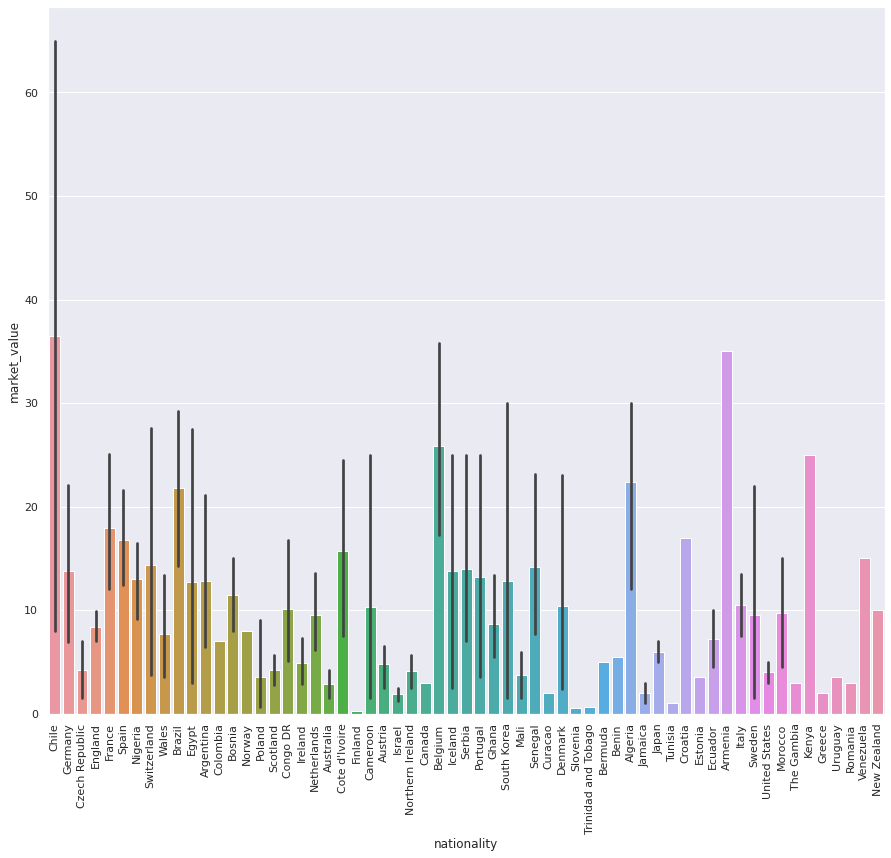

In [125]:
# let us see if market value of a player depends on his nationality
sns.set(rc={'figure.figsize':(15,13)})
sns.barplot(x=df['nationality'],y=df['market_value'])
plt.xticks(rotation='vertical')
plt.show()

We see that some of the nationalities don't have the range bar lets look at them separately.

In [126]:
df.loc[df['nationality'] == 'Armenia']

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
271,Henrikh Mkhitaryan,Manchester+United,28,AM,1,35.0,3312,8.0,4.50%,73,4.0,Armenia,0,4,12,1,1


In [127]:
df.loc[df['nationality'] == 'Kenya']

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
383,Victor Wanyama,Tottenham,26,DM,2,25.0,1002,5.0,3.10%,103,4.0,Kenya,0,3,17,1,1


In [128]:
df.loc[df['nationality'] == 'Greece']

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
399,Jose Holebas,Watford,33,LB,3,2.0,345,5.0,0.60%,87,2.0,Greece,0,5,18,0,0


In [129]:
df.loc[df['nationality'] == 'Romania']

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
416,Costel Pantilimon,Watford,30,GK,4,3.0,268,4.5,0.20%,2,2.0,Romania,0,4,18,0,0


So it was happening because we have only one player's data from these nationalities.

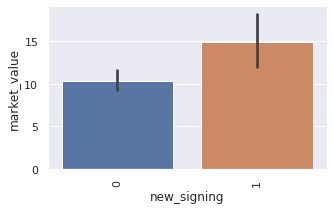

In [130]:
# let us see if market value of a player depends on whether he is newly signing from a different league.
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x=df['new_signing'],y=df['market_value'])
plt.xticks(rotation='vertical')
plt.show()

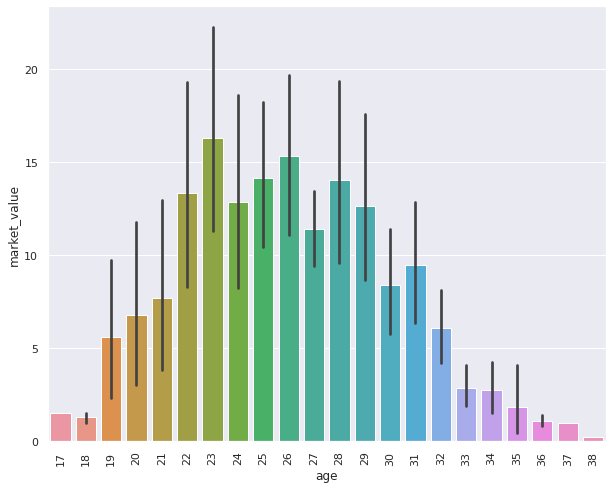

In [131]:
# let us see if market value of a player depends on his age.
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x=df['age'],y=df['market_value'])
plt.xticks(rotation='vertical')
plt.show()

It can be seen that young players with some experience in the age range of 22-29 are the ones with huge market value.

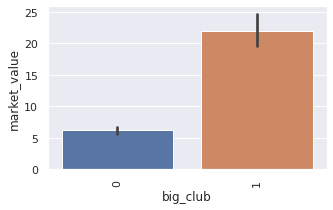

In [132]:
# let us see if market value of a player depends on whether he is from big club.
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x=df['big_club'],y=df['market_value'])
plt.xticks(rotation='vertical')
plt.show()

It highly depends on whether he is from big club. Market Value is high if the player is from a big club.

Let us explore how many values are there for specific column values.

In [133]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


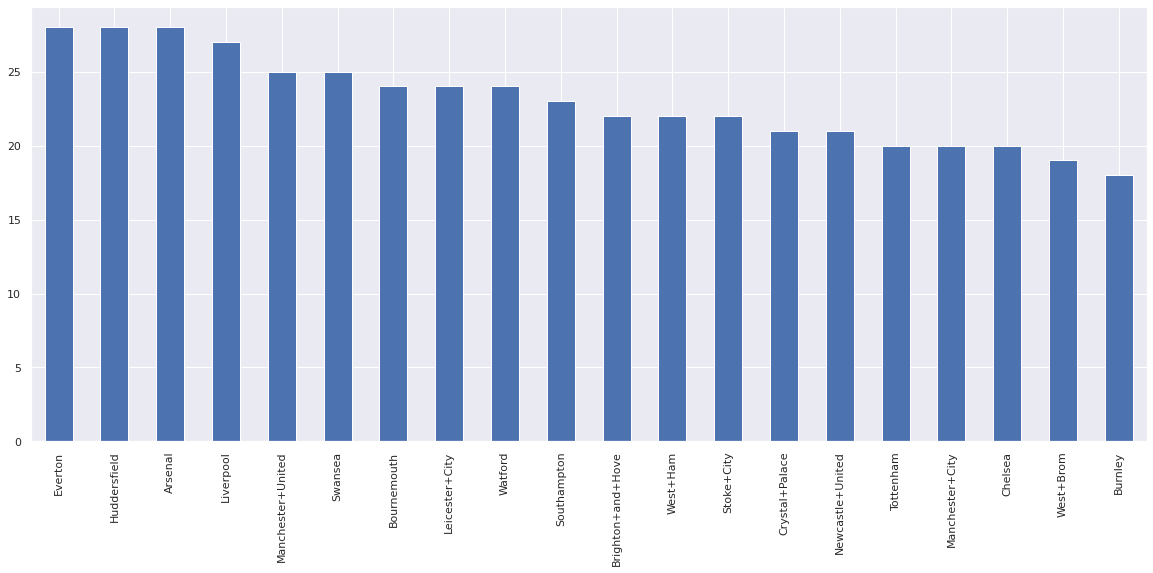

In [134]:
plt.rcParams["figure.figsize"] = (20,8)
df['club'].value_counts().plot(kind='bar')

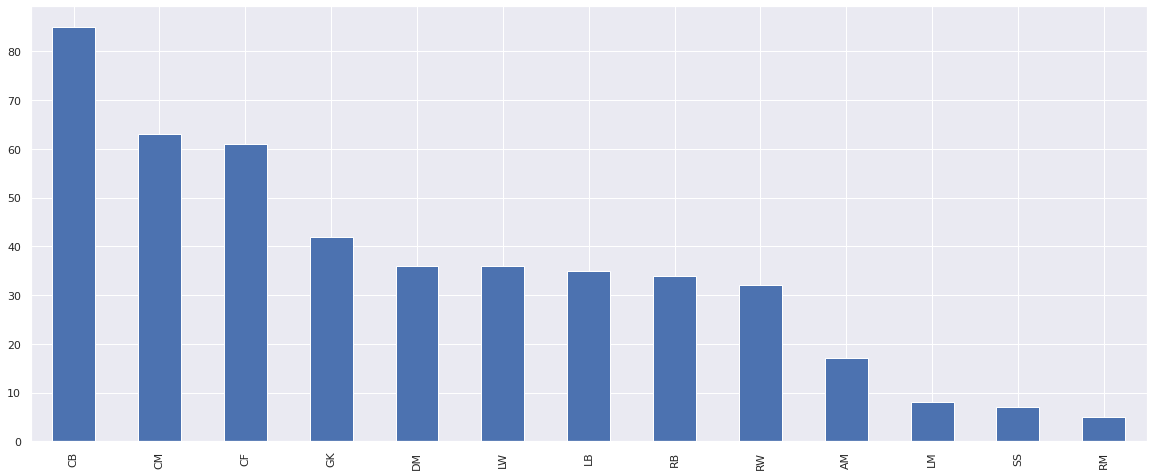

In [135]:
plt.rcParams["figure.figsize"] = (20,8)
df['position'].value_counts().plot(kind='bar')

It can be seen that the players we have there the maximum number is for the players who play at Centre Back Position.

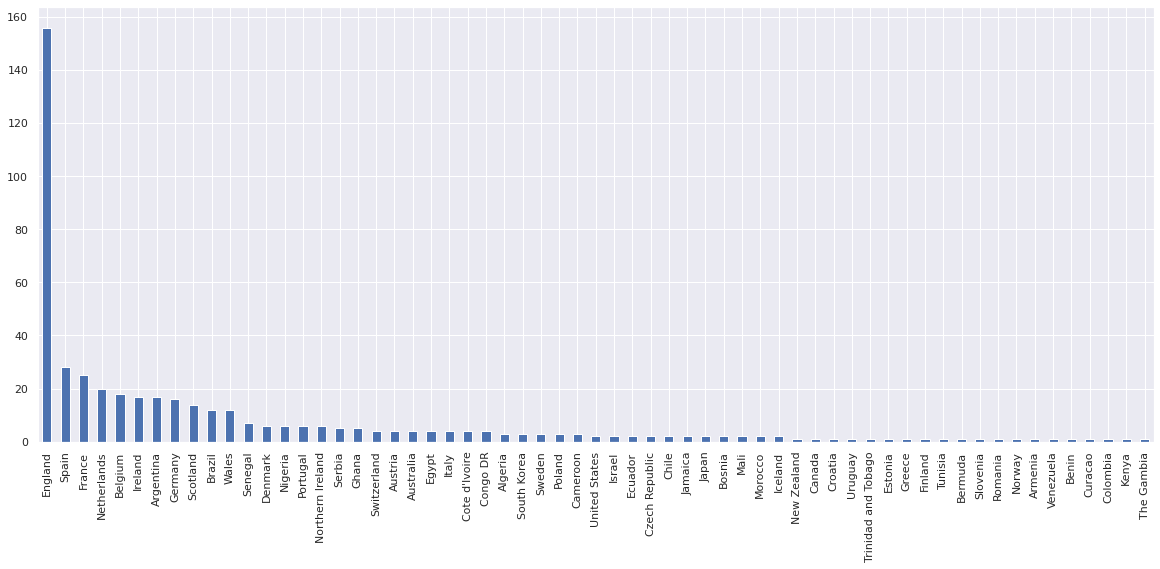

In [136]:
plt.rcParams["figure.figsize"] = (20,8)
df['nationality'].value_counts().plot(kind='bar')

It can be seen that maxiumum number of players are from England.And the difference from second Max that is Spain is huge.

In [137]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [138]:
df['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [139]:
df['position_cat'].unique()

array([1, 4, 3, 2])

In [140]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [141]:
print(missing_values_table(df))

Your selected dataframe has 17 columns.
There are 1 columns that have missing values.
        Missing Values  % of Total Values
region               1                0.2


In [142]:
df['region'].unique()

array([ 3.,  2.,  1.,  4., nan])

In [143]:
df[df['region'].isna()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


As there is only one column with 1 missing value we can replace this missing values with most frequently occuring value in that column.

In [144]:
df['region'].fillna(df['region'].mode()[0], inplace=True)

In [145]:
df[df['region'].isna()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing


In [146]:
print(missing_values_table(df))

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [147]:
df['region'].unique()
# lets convert this from float type to int type.

array([3., 2., 1., 4.])

In [148]:
df['region'].dtype

dtype('float64')

In [149]:
df['region'] = df['region'].astype(int)

In [150]:
df['region'].dtype

dtype('int64')

In [151]:
df['region'].unique()

array([3, 2, 1, 4])

In [152]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [153]:
df['fpl_sel'].dtype
# lets convert to numeric and remove the percentage symbol.

dtype('O')

In [154]:
df['fpl_sel'] = df['fpl_sel'].apply(lambda x:x[:-1])

In [155]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70,121,2,France,0,4,1,1,0


In [156]:
df['fpl_sel'].dtype

dtype('O')

In [157]:
df['fpl_sel'] = pd.to_numeric(df['fpl_sel'])

In [158]:
df['fpl_sel'].dtype

dtype('float64')

In [159]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2,France,0,4,1,1,0


In [160]:
numerical_columns

['age',
 'position_cat',
 'market_value',
 'page_views',
 'fpl_value',
 'fpl_points',
 'region',
 'new_foreign',
 'age_cat',
 'club_id',
 'big_club',
 'new_signing']

In [161]:
continuous_columns = ['page_views','fpl_value', 'fpl_sel','fpl_points', 'market_value']
categorical_columns = ['age_cat','region','position_cat', 'nationality', 'new_foreign', 'club_id', 'big_club', 'new_signing']

# out of age and age_cat we have taken age_cat as the feature
# out of club and club_id we have taken club_id as the feature
# out of position and position_cat we have taken position_cat as the feature 
# name feature has been dropped as it contributes nothing for our ML model.

In [162]:
print(f"The continuous columns are {continuous_columns}\nThe categorical columns are {categorical_columns}")

The continuous columns are ['page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'market_value']
The categorical columns are ['age_cat', 'region', 'position_cat', 'nationality', 'new_foreign', 'club_id', 'big_club', 'new_signing']


In [163]:
df.corr()['market_value']

age            -0.132396
position_cat   -0.217637
market_value    1.000000
page_views      0.739657
fpl_value       0.788653
fpl_sel         0.548703
fpl_points      0.615155
region          0.101629
new_foreign     0.098056
age_cat        -0.117682
club_id        -0.046068
big_club        0.593483
new_signing     0.131321
Name: market_value, dtype: float64

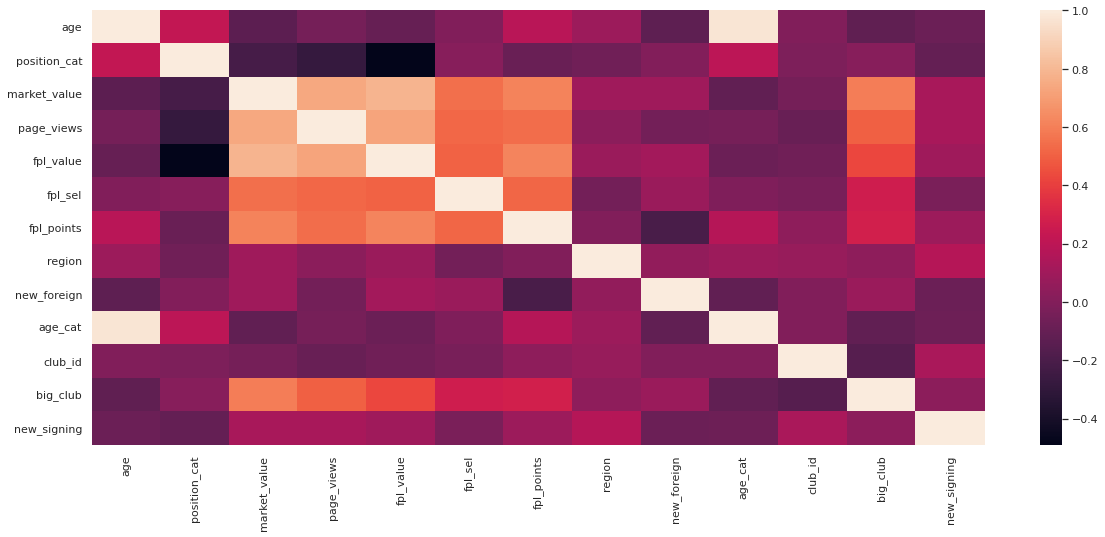

In [164]:
sns.heatmap(df.corr())

In [165]:
df.corr()['fpl_value']

age            -0.097659
position_cat   -0.491800
market_value    0.788653
page_views      0.730640
fpl_value       1.000000
fpl_sel         0.504888
fpl_points      0.618837
region          0.082420
new_foreign     0.108650
age_cat        -0.082056
club_id        -0.060884
big_club        0.423556
new_signing     0.098314
Name: fpl_value, dtype: float64

Correlation of any two columns is not that high that we need to drop them.

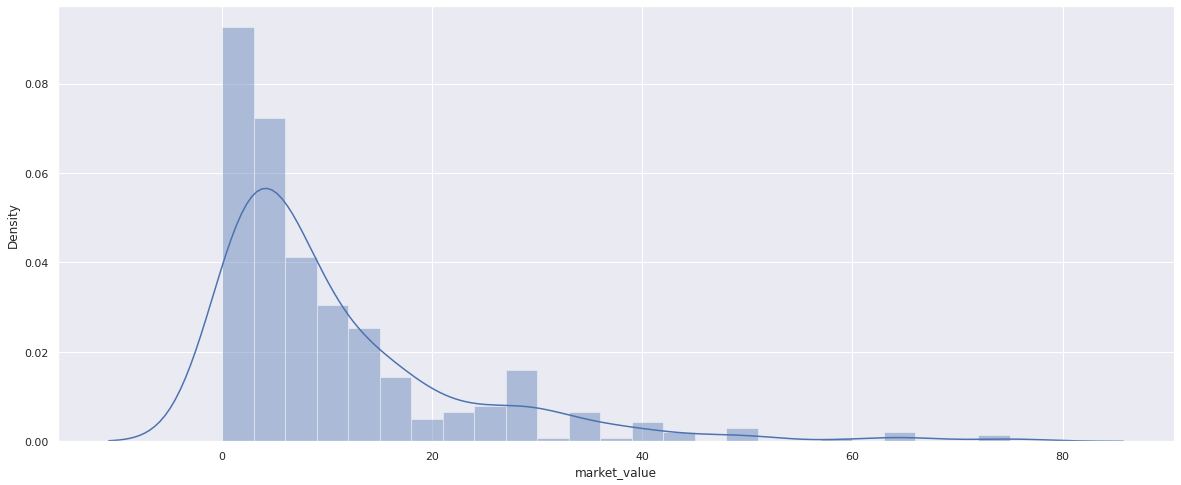

In [166]:
sns.distplot(df['market_value']);

We can see that our target column is little skewed so we will apply log transformation on it.

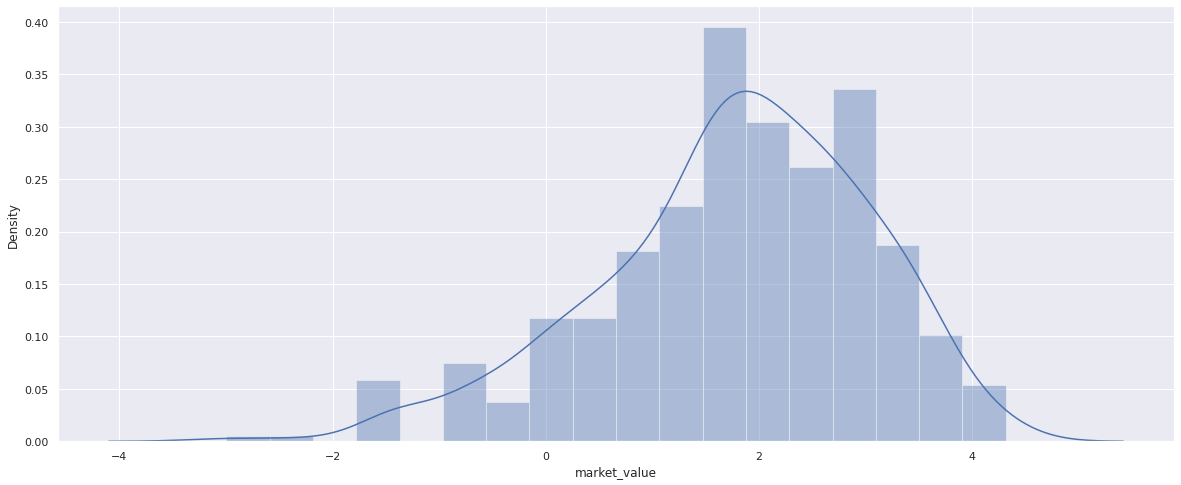

In [167]:
sns.distplot(np.log(df['market_value']));

In [168]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2,France,0,4,1,1,0


In [169]:
final_columns = list(set().union(continuous_columns,categorical_columns))

In [170]:
final_columns

['region',
 'fpl_value',
 'age_cat',
 'new_signing',
 'market_value',
 'new_foreign',
 'club_id',
 'fpl_points',
 'nationality',
 'big_club',
 'page_views',
 'fpl_sel',
 'position_cat']

In [171]:
len(final_columns)

13

In [172]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2,France,0,4,1,1,0


In [173]:
df = df[final_columns]
df.head()

,region,fpl_value,age_cat,new_signing,market_value,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
0,3,12.0,4,0,65.0,0,1,264,Chile,1,4329,17.1,1
1,2,9.5,4,0,50.0,0,1,167,Germany,1,4395,5.6,1
2,2,5.5,6,0,7.0,0,1,134,Czech Republic,1,1529,5.9,4
3,1,7.5,4,0,20.0,0,1,122,England,1,2393,1.5,1
4,2,6.0,4,0,22.0,0,1,121,France,1,912,0.7,3


# Getting our X and y

In [174]:
X = df.drop(columns=['market_value'])
y = np.log(df['market_value']) # target values will reduce as we applied log but we will scale it back before our final prediction. This is done to reduce the skewness in market value column.

In [175]:
X.head()

,region,fpl_value,age_cat,new_signing,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
0,3,12.0,4,0,0,1,264,Chile,1,4329,17.1,1
1,2,9.5,4,0,0,1,167,Germany,1,4395,5.6,1
2,2,5.5,6,0,0,1,134,Czech Republic,1,1529,5.9,4
3,1,7.5,4,0,0,1,122,England,1,2393,1.5,1
4,2,6.0,4,0,0,1,121,France,1,912,0.7,3


In [176]:
y.head()

0    4.174387
1    3.912023
2    1.945910
3    2.995732
4    3.091042
Name: market_value, dtype: float64

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [178]:
X_train.shape

(414, 12)

In [179]:
X_test.shape

(47, 12)

In [180]:
y_train.shape

(414,)

In [181]:
y_test.shape

(47,)

In [182]:
X_train['club_id'].unique()

array([10,  9,  7,  1,  6, 13, 12, 19,  2,  8,  5, 17, 11,  3, 16, 20, 14,
       18,  4, 15])

In [183]:
len(X_train['nationality'].unique())

61

In [184]:
X_test.loc[175].shape

(12,)

In [185]:
X_test.head()

,region,fpl_value,age_cat,new_signing,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
175,2,4.5,1,0,0,8,0,Denmark,0,157,0.1,2
322,2,7.0,3,0,0,14,38,Italy,0,2012,5.2,1
423,1,4.5,6,0,0,19,113,England,0,484,20.7,4
344,2,5.5,3,0,0,15,30,Spain,0,1325,0.2,1
19,1,5.0,1,1,0,1,32,England,1,666,1.7,3


Importing libraries to implement the algorithms and check their performance.

In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [187]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [188]:
import xgboost

In [189]:
xgboost.__version__

'0.90'

In [190]:
X.head()

,region,fpl_value,age_cat,new_signing,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
0,3,12.0,4,0,0,1,264,Chile,1,4329,17.1,1
1,2,9.5,4,0,0,1,167,Germany,1,4395,5.6,1
2,2,5.5,6,0,0,1,134,Czech Republic,1,1529,5.9,4
3,1,7.5,4,0,0,1,122,England,1,2393,1.5,1
4,2,6.0,4,0,0,1,121,France,1,912,0.7,3


In [191]:
X_train.head()

,region,fpl_value,age_cat,new_signing,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
231,2,4.5,1,0,0,10,15,England,1,327,0.3,3
209,2,4.5,3,1,0,9,6,France,0,325,0.1,2
141,2,4.5,3,0,0,7,89,Spain,0,304,0.4,4
24,1,4.5,3,0,0,1,2,England,1,561,0.4,3
117,2,4.5,4,0,0,6,92,Wales,0,242,2.1,4


In [192]:
X_test.head()

,region,fpl_value,age_cat,new_signing,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
175,2,4.5,1,0,0,8,0,Denmark,0,157,0.1,2
322,2,7.0,3,0,0,14,38,Italy,0,2012,5.2,1
423,1,4.5,6,0,0,19,113,England,0,484,20.7,4
344,2,5.5,3,0,0,15,30,Spain,0,1325,0.2,1
19,1,5.0,1,1,0,1,32,England,1,666,1.7,3


From above we have categorical columns as :
>
1. nationality --> Index = 7
2. position_cat --> Index = 11
3. new_signing --> Index = 3
4. new_foreign --> Index = 4
5. region --> Index = 0
6. club_id --> Index = 5
7. age_cat --> Index = 2
8. big_club --> Index = 8

## Linear Regression 

In [193]:
pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = LinearRegression()

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6571048246674174
MAE 0.6040952398242924


In [194]:
np.exp(0.6)

1.8221188003905089

Means we are getting difference of only 1.82 in the market value of players between predicted and actual which is good. Lets try all the other regression algorithms which have been learnt.

## Ridge Regression

In [195]:
for alpha in range(0,50,5):
    pipeline_step1 = ColumnTransformer(transformers=[
        ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = Ridge(alpha = alpha)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for alpha = {alpha} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for alpha = {alpha} is {mean_absolute_error(y_test,y_pred)}\n")
    #print('MAE',mean_absolute_error(y_test,y_pred))

R2 score for alpha = 0 is 0.6571048246674176

Mean Absolute Error for alpha = 0 is 0.6040952398241891

R2 score for alpha = 5 is 0.7695640149291925

Mean Absolute Error for alpha = 5 is 0.48537158073204373

R2 score for alpha = 10 is 0.7802539173241744

Mean Absolute Error for alpha = 10 is 0.4920053894622258

R2 score for alpha = 15 is 0.7767989775730816

Mean Absolute Error for alpha = 15 is 0.5022828153889238

R2 score for alpha = 20 is 0.7686641421980738

Mean Absolute Error for alpha = 20 is 0.5144278637803971

R2 score for alpha = 25 is 0.7589621350550506

Mean Absolute Error for alpha = 25 is 0.5270987068244306

R2 score for alpha = 30 is 0.7489274562782666

Mean Absolute Error for alpha = 30 is 0.5373532675358346

R2 score for alpha = 35 is 0.739084094990722

Mean Absolute Error for alpha = 35 is 0.5457763010110188

R2 score for alpha = 40 is 0.7296530959748213

Mean Absolute Error for alpha = 40 is 0.5528291352188384

R2 score for alpha = 45 is 0.7207172900259335

Mean Absolut

alpha = 10 works best

In [196]:
pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = Ridge(alpha = 10)

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7802539173241744
MAE 0.4920053894622258


## Lasso Regression

In [197]:
for alpha in [0.001,0.005,0.01,0.05,0.1,0.5]:
    pipeline_step1 = ColumnTransformer(transformers=[
        ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = Lasso(alpha = alpha)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for alpha = {alpha} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for alpha = {alpha} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for alpha = 0.001 is 0.7201403908634494

Mean Absolute Error for alpha = 0.001 is 0.5296477482052029

R2 score for alpha = 0.005 is 0.7787586860983655

Mean Absolute Error for alpha = 0.005 is 0.46810029516589036

R2 score for alpha = 0.01 is 0.7991809472645413

Mean Absolute Error for alpha = 0.01 is 0.4737627747706639

R2 score for alpha = 0.05 is 0.6273607091072843

Mean Absolute Error for alpha = 0.05 is 0.6193224823032344

R2 score for alpha = 0.1 is 0.4772234048210071

Mean Absolute Error for alpha = 0.1 is 0.7506007263873437

R2 score for alpha = 0.5 is 0.41477562927687994

Mean Absolute Error for alpha = 0.5 is 0.8074153416690333



alpha = 0.01 looks best 

In [198]:
pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = Lasso(alpha = 0.01)

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7991809472645413
MAE 0.4737627747706639


# KNN Regressor

In [199]:
for n_neighbors in [3, 5, 7, 9]:
    pipeline_step1 = ColumnTransformer(transformers=[
        ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = KNeighborsRegressor(n_neighbors= n_neighbors)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for n_neighbors = {n_neighbors} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for n_neighbors = {n_neighbors} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for n_neighbors = 3 is 0.4649918298314437

Mean Absolute Error for n_neighbors = 3 is 0.7187973563240186

R2 score for n_neighbors = 5 is 0.44223970581935823

Mean Absolute Error for n_neighbors = 5 is 0.7515923702526709

R2 score for n_neighbors = 7 is 0.4661781742950496

Mean Absolute Error for n_neighbors = 7 is 0.7344341654736385

R2 score for n_neighbors = 9 is 0.4771105861927014

Mean Absolute Error for n_neighbors = 9 is 0.7261039341368817



Results are very poor with KNN Regressor

# Decision Tree

In [200]:
DecisionTreeRegressor(max_depth=8)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [201]:
for max_depth in [4, 6, 8, 10, 12, 14]:
    pipeline_step1 = ColumnTransformer(transformers=[
        ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = DecisionTreeRegressor(max_depth= max_depth)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for max_depth = {max_depth} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for max_depth = {max_depth} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for max_depth = 4 is 0.651935631745575

Mean Absolute Error for max_depth = 4 is 0.5919811210278101

R2 score for max_depth = 6 is 0.6435899359461358

Mean Absolute Error for max_depth = 6 is 0.5789268652701444

R2 score for max_depth = 8 is 0.6772199073111856

Mean Absolute Error for max_depth = 8 is 0.5476110868056646

R2 score for max_depth = 10 is 0.7004885790099848

Mean Absolute Error for max_depth = 10 is 0.538528304749921

R2 score for max_depth = 12 is 0.6779598815471972

Mean Absolute Error for max_depth = 12 is 0.5749854178428488

R2 score for max_depth = 14 is 0.6614954297881807

Mean Absolute Error for max_depth = 14 is 0.56295538244718



## Random Forest

In [202]:
for n_estimators in range(1,20):
    pipeline_step1 = ColumnTransformer(transformers=[
        ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = RandomForestRegressor(n_estimators=n_estimators,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=10)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for n_estimators = {n_estimators} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for n_estimators = {n_estimators} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for n_estimators = 1 is 0.6014637630566686

Mean Absolute Error for n_estimators = 1 is 0.6454734040622162

R2 score for n_estimators = 2 is 0.6725940704771847

Mean Absolute Error for n_estimators = 2 is 0.58035905288565

R2 score for n_estimators = 3 is 0.727018629342913

Mean Absolute Error for n_estimators = 3 is 0.5353101823688574

R2 score for n_estimators = 4 is 0.7753954141548894

Mean Absolute Error for n_estimators = 4 is 0.47738190013731735

R2 score for n_estimators = 5 is 0.7430287126259799

Mean Absolute Error for n_estimators = 5 is 0.5348178582449771

R2 score for n_estimators = 6 is 0.7298651432001533

Mean Absolute Error for n_estimators = 6 is 0.5320330840948689

R2 score for n_estimators = 7 is 0.7481529874511046

Mean Absolute Error for n_estimators = 7 is 0.5096210779460327

R2 score for n_estimators = 8 is 0.7384410130599581

Mean Absolute Error for n_estimators = 8 is 0.5226524937000477

R2 score for n_estimators = 9 is 0.7320843650456503

Mean Absolute

n_estimators = 8 looks best

In [203]:
pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = RandomForestRegressor(n_estimators=8,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=10)

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"R2 score for n_estimators = {n_estimators} is {r2_score(y_test,y_pred)}\n")
print(f"Mean Absolute Error for n_estimators = {n_estimators} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for n_estimators = 19 is 0.7384410130599581

Mean Absolute Error for n_estimators = 19 is 0.5226524937000477



## SVM Regression

In [204]:
SVR(kernel='rbf',C=10000,epsilon=0.1)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [205]:
for C in [100,500,1000,5000,10000,15000,20000]:
    pipeline_step1 = ColumnTransformer(transformers=[
        ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = SVR(kernel='rbf',C=C,epsilon=0.01)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for C = {C} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for C = {C} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for C = 100 is 0.5078075894520644

Mean Absolute Error for C = 100 is 0.6982463626021005

R2 score for C = 500 is 0.5120461227604085

Mean Absolute Error for C = 500 is 0.6892568573031166

R2 score for C = 1000 is 0.5269400532417995

Mean Absolute Error for C = 1000 is 0.6808997958542657

R2 score for C = 5000 is 0.6002141747818486

Mean Absolute Error for C = 5000 is 0.6355495824814847

R2 score for C = 10000 is 0.6463432157989271

Mean Absolute Error for C = 10000 is 0.599334742857103

R2 score for C = 15000 is 0.6804492078787604

Mean Absolute Error for C = 15000 is 0.5672197290279867

R2 score for C = 20000 is 0.7043794828275948

Mean Absolute Error for C = 20000 is 0.5524859722062881



Results are not good even after trying various values of hyperparameters.

## Adaboost

In [206]:
AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=15, random_state=None)

In [207]:
pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = AdaBoostRegressor(n_estimators=15,learning_rate=0.5)

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6756414386916424
MAE 0.6103860425047267


Results from Adaboost are not that great even after trying various values of the hyper parameters.

In [208]:
GradientBoostingRegressor(n_estimators=500)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [209]:
for n_estimators in range(100,1000,100):
    pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = GradientBoostingRegressor(n_estimators=n_estimators)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for n_estimators = {n_estimators} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for n_estimators = {n_estimators} is {mean_absolute_error(y_test,y_pred)}\n")

R2 score for n_estimators = 100 is 0.7758146255206686

Mean Absolute Error for n_estimators = 100 is 0.5033687407516385

R2 score for n_estimators = 200 is 0.7969059080609288

Mean Absolute Error for n_estimators = 200 is 0.48170697067262186

R2 score for n_estimators = 300 is 0.7941057418820507

Mean Absolute Error for n_estimators = 300 is 0.48429379793568594

R2 score for n_estimators = 400 is 0.7845130133059742

Mean Absolute Error for n_estimators = 400 is 0.4951839057654656

R2 score for n_estimators = 500 is 0.7834402023768435

Mean Absolute Error for n_estimators = 500 is 0.49815762447745393

R2 score for n_estimators = 600 is 0.7804641497397642

Mean Absolute Error for n_estimators = 600 is 0.5007850885205088

R2 score for n_estimators = 700 is 0.7795166850674843

Mean Absolute Error for n_estimators = 700 is 0.5001551532043972

R2 score for n_estimators = 800 is 0.7781173550642326

Mean Absolute Error for n_estimators = 800 is 0.5031810515231016

R2 score for n_estimators = 9

n_estimators = 300 looks best 

In [210]:
pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = GradientBoostingRegressor(n_estimators=300)

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7936633942518627
MAE 0.48546791078487384


## XGBoost Regressor

In [211]:
XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=45,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [212]:
for n_estimators in range(5,100,5):
    pipeline_step1 = ColumnTransformer(transformers=[
    ('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
    ],remainder='passthrough')

    pipeline_step2 = XGBRegressor(n_estimators=n_estimators,max_depth=5,learning_rate=0.5)

    pipe = Pipeline([
        ('Part1',pipeline_step1),
        ('Part2',pipeline_step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print(f"R2 score for n_estimators = {n_estimators} is {r2_score(y_test,y_pred)}\n")
    print(f"Mean Absolute Error for n_estimators = {n_estimators} is {mean_absolute_error(y_test,y_pred)}\n")

[18:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for n_estimators = 5 is 0.8129250586600794

Mean Absolute Error for n_estimators = 5 is 0.46292558918964116

[18:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for n_estimators = 10 is 0.8210324866415843

Mean Absolute Error for n_estimators = 10 is 0.4408950869776263

[18:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for n_estimators = 15 is 0.8176487974133324

Mean Absolute Error for n_estimators = 15 is 0.4485030746879526

[18:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for n_estimators = 20 is 0.8058828212747489

Mean Absolute Error for n_estimators = 20 is 0.4614712240710126

[18:28:10] WARNIN

n_estimators = 10 looks best 

In [213]:
pipeline_step1 = ColumnTransformer(transformers=[
('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

pipeline_step2 = XGBRegressor(n_estimators=10,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"R2 score for n_estimators = {n_estimators} is {r2_score(y_test,y_pred)}\n")
print(f"Mean Absolute Error for n_estimators = {n_estimators} is {mean_absolute_error(y_test,y_pred)}\n")

[18:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for n_estimators = 95 is 0.8210324866415843

Mean Absolute Error for n_estimators = 95 is 0.4408950869776263



## Voting Regressor

In [214]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [215]:
pipeline_step1 = ColumnTransformer(transformers=[
('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=8,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=10)
gbdt = GradientBoostingRegressor(n_estimators=300)
xgb = XGBRegressor(n_estimators=10,max_depth=5,learning_rate=0.5)
# et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
ls = Lasso(alpha = 0.01)
rdg = Ridge(alpha = 10)

pipeline_step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('lasso',ls), ('ridge', rdg)],weights=[1,1,1,1,1])


pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"R2 score  is {r2_score(y_test,y_pred)}\n")
print(f"Mean Absolute Error  is {mean_absolute_error(y_test,y_pred)}\n")




[18:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score  is 0.8348358064509476

Mean Absolute Error  is 0.4330651140959993



## Stacking

In [216]:
pipeline_step1 = ColumnTransformer(transformers=[
('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=8,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)),
    ('gbdt',GradientBoostingRegressor(n_estimators=300)),
    ('xgb', XGBRegressor(n_estimators=10,max_depth=5,learning_rate=0.5)),
    ('lasso', Lasso(alpha = 0.01)),
    ('ridge', Ridge(alpha = 10))
]


pipeline_step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=10))

pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"R2 score  is {r2_score(y_test,y_pred)}\n")
print(f"Mean Absolute Error  is {mean_absolute_error(y_test,y_pred)}\n")

[18:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score  is 0.8363850225221996

Mean Absolute Error  is 0.436351009455462



From above we can see that Voting Regressor is giving us the best results hence we will export that model finally.

In [217]:
# final model voting regressor

pipeline_step1 = ColumnTransformer(transformers=[
('column_transformer',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,5,7,8,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=8,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=10)
gbdt = GradientBoostingRegressor(n_estimators=300)
xgb = XGBRegressor(n_estimators=10,max_depth=5,learning_rate=0.5)
# et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
ls = Lasso(alpha = 0.01)
rdg = Ridge(alpha = 10)

pipeline_step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('lasso',ls), ('ridge', rdg)],weights=[1,1,1,1,1])


pipe = Pipeline([
    ('Part1',pipeline_step1),
    ('Part2',pipeline_step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(f"R2 score  is {r2_score(y_test,y_pred)}\n")
print(f"Mean Absolute Error  is {mean_absolute_error(y_test,y_pred)}\n")

[18:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score  is 0.8350242316991379

Mean Absolute Error  is 0.4327700024942865



### Exporting our model.

In [218]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [219]:
X_test.head()

,region,fpl_value,age_cat,new_signing,new_foreign,club_id,fpl_points,nationality,big_club,page_views,fpl_sel,position_cat
175,2,4.5,1,0,0,8,0,Denmark,0,157,0.1,2
322,2,7.0,3,0,0,14,38,Italy,0,2012,5.2,1
423,1,4.5,6,0,0,19,113,England,0,484,20.7,4
344,2,5.5,3,0,0,15,30,Spain,0,1325,0.2,1
19,1,5.0,1,1,0,1,32,England,1,666,1.7,3
